In [1]:
import sys 
sys.path.append('../../../../../')
from plot_tools.fig_preamble import * # imports numpy, matplotlib, Py2PDF, plot_helper_funcs, plot_figstyle_sheet
import GPy
from analysis_tools.common import sqr_err
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

/home/riddhisw/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:
/home/riddhisw/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1182: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markeredgecolor != ec:


In [2]:
ver=0
datapath = '../../../../DATA_v'+str(ver)+'_/' #v'+str(ver)+'/DATA_v'+str(ver)+'/'

savefig2 = '../svg/paper_v0_'
figname2 = 'GPR_BR_calc_2'

dataforkappa0 = 'GPR_BR_calc'
dataforkapparange= 'GPR_BR_calc_2'
dataforkernels = 'GPR_BR_calc_RBF_RQ_MAT32_QPER_PER'

# GPR_BR_calc covered the following periodicities:
# periodicities = ((2000, 2001), (0, 10**3), (10**3, 10**4), (10**4, 10**5), (None, None))

# GPR_BR_calc2 covered the following periodicities:
# periodicities = ((0, 2*10**3), (2*10**3, 4*10**3), (4*10**3, 6*10**3), (6*10**3, 8*10**3), (8*10**3, 10**4), (10**4, 10**5), (None, None))


In [3]:
########################################################################
# Periodic Kernel
########################################################################
data_object = np.load(datapath+dataforkapparange+'.npz')
datagen = data_object.iteritems()

for idx_ in xrange(len(data_object.files)):
    try:
        stored_item = datagen.next()
        print stored_item[0]
        vars()[stored_item[0]] = stored_item[1]    
    except StopIteration:
        pass

    
########################################################################
# Periodic Kernel
########################################################################
at_fourier_data = np.load(datapath+dataforkappa0+'.npz')
datagen_f = at_fourier_data.iteritems()

for idx_ in xrange(len(at_fourier_data.files)):
    try:
        stored_item = datagen_f.next()
        print stored_item[0]+'_f'
        vars()[stored_item[0]+'_f'] = stored_item[1]    
    except StopIteration:
        pass

########################################################################
# Other Kernels
########################################################################

data_object_ = np.load(datapath+dataforkernels+'.npz')
datagen_ = data_object_.iteritems()

for idx_ in xrange(len(data_object_.files)):
    try:
        stored_item = datagen_.next()
        print stored_item[0]+'_'
        vars()[stored_item[0]+'_'] = stored_item[1]    
    except StopIteration:
        pass


truth_list
Delta_T
period_0
failed_runs_list
periodicities
pred_list
n_train
sigma_0
variation
n_testbefore
n_predict
opt_list
length_scale_0
R_0
total_runs
test_case
truth_list_f
pred_list_f
opt_list_f
failed_runs_list_f
truth_list_
total_runs_
failed_runs_list_
Delta_T_
pred_list_
n_train_
msmt_var_
variation_
n_testbefore_
n_predict_
kernel_name_
test_case_


In [4]:
print "The following periodicities were constrained for the periodic kernel..."
print periodicities
print 
print "In addition to the periodic kernel, we additonally considered standard implementations of..."
print kernel_name_

The following periodicities were constrained for the periodic kernel...
[[0 2000]
 [2000 4000]
 [4000 6000]
 [6000 8000]
 [8000 10000]
 [10000 100000]
 [None None]]

In addition to the periodic kernel, we additonally considered standard implementations of...
['RBF' 'RQ' 'MAT32' 'QPER' 'PER']


In [10]:
##########################################################################################
# Plot predictions 
##########################################################################################

kernels_keys =  ['MAT32', 'QPER', 'PER', 'RBF', 'RQ'] #list(kernel_name_) #+ ['PER'] #'RBF', 'RQ', 'MAT32',
pltstyle_ =   [':', ':', '-', '-', '-']

TRUTH_DATA = {'RBF': truth_list_[0],
              'RQ': truth_list_[1],
              'MAT32': truth_list_[2] ,
              'PER': truth_list_[4], 
              'QPER':truth_list_[3]
}

PRED_DATA = {'RBF': pred_list_[0],
              'RQ': pred_list_[1] ,
              'MAT32' : pred_list_[2],
              'PER': pred_list_[4], 
              'QPER':pred_list_[3]
}

CLEAN_RUNS = {'RBF':np.delete(np.arange(total_runs_), failed_runs_list_[0][(failed_runs_list_[0]>0)]),
              'RQ': np.delete(np.arange(total_runs_), failed_runs_list_[1][(failed_runs_list_[1]>0)]),
              'MAT32': np.delete(np.arange(total_runs_), failed_runs_list_[2][(failed_runs_list_[2]>0)]),
              'QPER': np.delete(np.arange(total_runs_), failed_runs_list_[3][(failed_runs_list_[3]>0)]),
              'PER': np.delete(np.arange(total_runs_), failed_runs_list_[4][(failed_runs_list_[4]>0)]),              
}


COLOR_KERNELS = {'RQ': 'green', #green
              'RBF': 'darkslateblue',
              'MAT32': 'steelblue', #steel blue
              'QPER': 'purple', 
              'PER': 'maroon',              
}

color_gradient = [ 'k', 'palevioletred',  'maroon', 'darkslategrey' ] 
#[ 'darkslategrey', 'darkgreen',  'maroon', 'steelblue' ] 

max_clean_run = min([ CLEAN_RUNS[kernels_keys[x]].shape[0] for x in xrange(len(kernels_keys))])

data_plot_list = [0, 1, 2, 5] # for kappa varying
pltstyle = ['v']+ ['o'] + ['-'] + ['-']
lgnd_labels = [r'$\kappa < 0$'] + [r'$\kappa \approx  10^{2}$'] + [r'$\kappa \approx  10^{3}$'] + [r'$\kappa \approx 10^{4}$']


6


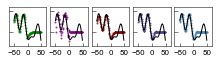

<function matplotlib.pyplot.close>

In [11]:
gs = gridspec.GridSpec(1, 5,
                       left=0.15, right=0.985, 
                       top=0.9, bottom=0.2, 
                       wspace=0.1, hspace=0.2)

fig1 = plt.figure(figsize=(cm2inch(8.6),cm2inch(2.)))

ax_a = fig1.add_subplot(gs[0,0])
ax_b = fig1.add_subplot(gs[0,1], sharey=ax_a)
ax_c = fig1.add_subplot(gs[0,2], sharey=ax_a)
ax_d = fig1.add_subplot(gs[0,3], sharey=ax_a)
ax_e = fig1.add_subplot(gs[0,4], sharey=ax_a)

ax_list = [ax_a, ax_b, ax_c, ax_d, ax_e]

pickrun = 6 #int(np.random.uniform(low=0, high=50))#max_clean_run)) #4
print pickrun

for idx_algo in xrange(len(kernels_keys)):
    
    ax1=0
    ax1 = ax_list[idx_algo]
    #ax1.set_title(kernels_keys[idx_algo], fontsize=8)
    
    ax1.plot(np.arange(-50, 0, 1), PRED_DATA[kernels_keys[idx_algo]][pickrun][0:50:1], '.',
         c=COLOR_KERNELS[kernels_keys[idx_algo]], 
         markerfacecolor='None', #steelblue',
         markeredgecolor=COLOR_KERNELS[kernels_keys[idx_algo]],
         markeredgewidth=1.0,
         ms=2, lw=2.0,
         alpha=0.75)
    ax1.plot(np.arange(0, 50, 1), PRED_DATA[kernels_keys[idx_algo]][pickrun][50:100:1], '.',
             c=COLOR_KERNELS[kernels_keys[idx_algo]], 
             markerfacecolor=COLOR_KERNELS[kernels_keys[idx_algo]],
             ms=2, lw=2.0, 
             alpha=0.75,
             markeredgecolor=COLOR_KERNELS[kernels_keys[idx_algo]])
             #label = kernels_keys[idx_algo])
    
    ax1.plot(np.arange(-50, 50), TRUTH_DATA[kernels_keys[idx_algo]][pickrun][0:100], 
             'k', lw=1.0)
    
    if ax1 != ax_a:
        ax1.set_yticklabels([])
    
#     if ax1 == ax_a:    
#         ax1.legend(loc=4,  ncol=4, fontsize=fsize, frameon=False, bbox_to_anchor=(0., 1.02, 1., .102), 
#           mode="expand", borderaxespad=0.)
    
    ax1.tick_params(direction='in', which='both')
    ax1.margins(0.2)
    ax1.set(xlabel='', ylabel='')
    ax1.minorticks_off()
    ax1 = set_font_sizes(ax1, fsize, Fsize)
    #ax1.legend(loc=2)
    
fig1.savefig(savefig2+figname2+'traces'+'.svg', format='svg', dpi=my_dpi)
plt.show()
plt.close

# 9, 46

('For periodicity index, ', 0, ', total no. of failed runs is:', 1)
('For periodicity index, ', 1, ', total no. of failed runs is:', 1)
('For periodicity index, ', 2, ', total no. of failed runs is:', 0)
('For periodicity index, ', 5, ', total no. of failed runs is:', 12)
('For kernel, ', 'MAT32', 'no of failed runs', 0)
('For kernel, ', 'QPER', 'no of failed runs', 5)
('For kernel, ', 'PER', 'no of failed runs', 0)
('For kernel, ', 'RBF', 'no of failed runs', 0)
('For kernel, ', 'RQ', 'no of failed runs', 11)


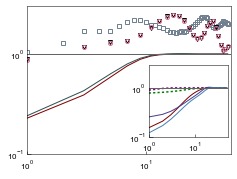

In [20]:
forecastng_errors = np.zeros(( len(periodicities), total_runs, n_predict ))
bayes_pred_risk = np.zeros(( len(periodicities), n_predict ))

forecastng_errors_f = np.zeros(( len(kernel_name_), total_runs_, n_predict_))
bayes_pred_risk_f = np.zeros(( len(kernel_name_), n_predict_ ))

gs = gridspec.GridSpec(2, 2,
                       left=0.15, right=0.985, 
                       top=0.97, bottom=0.1, 
                       wspace=0.1, hspace=0.2)

fig2 = plt.figure(figsize=(cm2inch(8.6),cm2inch(6.)))
ax = fig2.add_subplot(gs[0:2, 0:2])

########################################################################
# Perioctity constrained to physical resolution
########################################################################

remove_runs_f = failed_runs_list_f[0][(failed_runs_list_f[0]>0)] 

case=0
for case in xrange(total_runs):

    forecastng_errors_f[0, case, :] = sqr_err(pred_list_f[0, case, n_testbefore:], 
                                                  truth_list_f[0, case, n_testbefore:])

    prd_zero_f = np.mean(np.delete(truth_list_f[0, :, :]**2, 
                                 remove_runs_f, axis=0), 
                       axis=0)[n_testbefore:]

    bayes_pred_risk_f[0, :] = np.mean(np.delete(forecastng_errors_f[0, :, :], 
                                                    remove_runs_f, axis=0),
                                          axis=0) / prd_zero_f

ax.plot(np.arange(n_predict)[1:50], bayes_pred_risk_f[0][1:50],
        's',  
        c='slategrey',
        markeredgecolor='slategrey',
        markerfacecolor='None',
        markeredgewidth=1., 
        markersize=4,
        lw=1.0, alpha=1.,
        label=r'$\kappa = 0$')
########################################################################
# Periodic Kernel at different kappa values
########################################################################

idx_per2=0
for idx_per_2 in xrange(len(data_plot_list)):
    
    idx_per=0
    idx_per = data_plot_list[idx_per_2]
    
    remove_runs = failed_runs_list[idx_per][(failed_runs_list[idx_per]>0)] 
    print("For periodicity index, ", idx_per, ", total no. of failed runs is:", remove_runs.shape[0])
    
    case=0
    for case in xrange(total_runs):
        
        forecastng_errors[idx_per, case, :] = sqr_err(pred_list[idx_per, case, n_testbefore:], 
                                                      truth_list[idx_per, case, n_testbefore:])
        
    prd_zero = np.mean(np.delete(truth_list[idx_per, :, :]**2, 
                                 remove_runs, axis=0), 
                       axis=0)[n_testbefore:]
    
    bayes_pred_risk[idx_per, :] = np.mean(np.delete(forecastng_errors[idx_per, :, :], 
                                                    remove_runs, axis=0),
                                          axis=0) / prd_zero
    
    ax.plot(np.arange(n_predict)[1:50:2], bayes_pred_risk[idx_per][1:50:2],
            pltstyle[idx_per_2],
            c=color_gradient[idx_per_2],
            markeredgecolor=color_gradient[idx_per_2],
            markerfacecolor='None',
            markeredgewidth=1., 
            markersize=4,
            lw=1.0, alpha=1.,
            label=lgnd_labels[idx_per_2])



########################################################################
# Inset - comparison with other kernels 
########################################################################
ax2 = inset_axes(ax, width=1.1,
                 height=1.0, 
                 bbox_to_anchor=(0.99, 0.18),
                 bbox_transform=ax.figure.transFigure,loc=4)

forecastng_errors_ = np.zeros(( len(kernel_name_), total_runs_, n_predict_))
bayes_pred_risk_ = np.zeros(( len(kernel_name_), n_predict_ ))
prd_zero_ = np.zeros(( len(kernel_name_),total_runs_, n_predict_ ))

idx_ker=0
for idx_ker in xrange(len(kernels_keys)):
    
    print("For kernel, ", kernels_keys[idx_ker], "no of failed runs", total_runs_ - CLEAN_RUNS[kernels_keys[idx_ker]].shape[0])
    
    case=0
    for case in CLEAN_RUNS[kernels_keys[idx_ker]][0:30]:  ### adjusted for actual runs
        
        forecastng_errors_[idx_ker, case, :] = sqr_err(PRED_DATA[kernels_keys[idx_ker]][case, n_testbefore_:], 
                                                      TRUTH_DATA[kernels_keys[idx_ker]][case, n_testbefore_:])
        
        prd_zero_[idx_ker, case, :] = TRUTH_DATA[kernels_keys[idx_ker]][case, n_testbefore_:]**2
    


    bayes_pred_risk_[idx_ker, :] = np.mean(forecastng_errors_[idx_ker, :, :]
                                           , axis=0) / np.mean(prd_zero_[idx_ker, :, :],
                                                             axis=0)
    linewidth_=1.0
    if kernels_keys[idx_ker]=='QPER' or kernels_keys[idx_ker]=='MAT32' :
        linewidth_=1.5
        
    ax2.plot(np.arange(n_predict_)[1:50], bayes_pred_risk_[idx_ker][1:50],
            pltstyle_[idx_ker],  
            c=COLOR_KERNELS[kernels_keys[idx_ker]],
            lw=linewidth_, alpha=1.,
            label=kernels_keys[idx_ker])    
    
    ax2.yaxis.set_ticks([])
    ax2.xaxis.set_ticks([])
    ax2.yaxis.set_ticklabels([])
    ax2.xaxis.set_ticklabels([])
    

for axes in [ax, ax2]:
    axes.yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=2))
       
    axes.tick_params(direction='in', which='both')
    axes.margins(0.2)
    axes.set(xlabel='', ylabel='')
    
    
    axes.set_yscale('log')
    axes.set_xscale('log')
    axes.axhline(1.0,  color=COLOURDICT['DATA'], lw=prediczero_lw, alpha=1.0)
    axes.set_xlim([1, 52])
    axes.minorticks_off() 
    axes = set_font_sizes(axes, fsize, Fsize)

ax.set_ylim([10**-1, 3])    
# ax.legend(loc=4,  ncol=4, fontsize=fsize, frameon=False, bbox_to_anchor=(0., 1.02, 1., .102), 
#            mode="expand", borderaxespad=0.)
# ax2.legend(loc=4,  ncol=3, fontsize=fsize, frameon=False, bbox_to_anchor=(-0.9, 2., 2. ,.07), 
#            mode="expand", borderaxespad=0.)
ax2.set_ylim([10**-1, 3])  
fig2.savefig(savefig2+figname2+'.svg', format='svg', dpi=my_dpi)
plt.show()
plt.show()
